In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/CSC522_Final_Project'

/content/drive/MyDrive/CSC522_Final_Project


In [ ]:
!ls

enron_spam_data.csv	ham_subject_corpus   spam_subject_corpus
enron_spam_data.gsheet	spam_message_corpus


In [ ]:
#Import all libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize

import pickle
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Reading dataset
df = pd.read_csv("enron_spam_data.csv")

In [ ]:
print(df.head(10))

   Unnamed: 0                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   
6           6         meter 1517 - jan 1999   
7           7           duns number changes   
8           8                    king ranch   
9           9        re : entex transistion   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
5  jackie ,\nsince the inl

In [ ]:
label= df["Spam/Ham"].value_counts()
print(label)

spam    17171
ham     16545
Name: Spam/Ham, dtype: int64


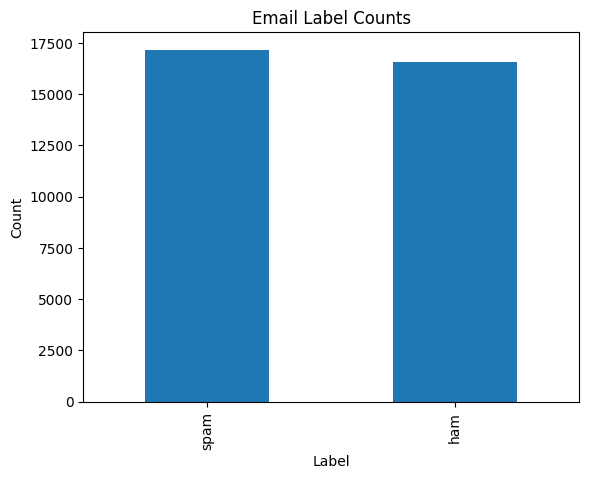

In [ ]:
#plot label counts
label.plot.bar()
plt.title("Email Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")
#show the number over the bar
plt.show()

In [ ]:
# convert all text to lowwer case
df['Subject'] = df['Subject'].str.lower()
df['Message'] = df['Message'].str.lower()


In [ ]:
df.head(5)

,Unnamed: 0,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [ ]:
#preprocessing to remove punctuations and words like re : from subject and message
df['Subject'].fillna('', inplace=True)
df['Message'].fillna('', inplace=True)
df['Subject'] = df['Subject'].str.replace('[^\w\s]', '', regex=True)
df['Message'] = df['Message'].str.replace('[^\w\s]', '', regex=True)

In [ ]:
# Combining 'Subject' and 'Message' into a single column
df['text'] = df['Subject'] + ' ' + df['Message']

In [ ]:
# Assuming df is your DataFrame containing the 'text' column
# Tokenize the 'text' column and create a new column 'tokenized_text' to store the tokenized data
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))
df['tokenized_subject'] = df['Subject'].apply(lambda x: word_tokenize(x))
df['tokenized_message'] = df['Message'].apply(lambda x: word_tokenize(x))

In [ ]:
def make_wordcloud(text , stopword):
    word_cloud = WordCloud(
            width=900,
            height=600,
            random_state=1,
            background_color="black",
            colormap="Pastel1",
            collocations=False,
            stopwords=stopword,
            ).generate(text)
    return word_cloud

In [ ]:
spam_subject_corpus = []
spam_message_corpus = []
ham_subject_corpus = []
ham_message_corpus = []

In [ ]:
spam_subject_corpus = df[df['Spam/Ham']=='spam']['tokenized_subject'].to_list()
#print(spam_subject_corpus)
spam_subject_corpus = [item for sublist in spam_subject_corpus for item in sublist]
#print(spam_subject_corpus[:20])

In [ ]:
spam_message_corpus = df[df['Spam/Ham']=='spam']['tokenized_message'].to_list()
print(spam_message_corpus[:5])
spam_message_corpus = [item for sublist in spam_message_corpus for item in sublist]
print(spam_message_corpus[:20])

[['i', 'tried', 'calling', 'you', 'this', 'am', 'but', 'your', 'phone', 'rolled', 'to', 'someone', 'else', 's', 'voicemail', 'can', 'you', 'call', 'me', 'when', 'you', 'get', 'a', 'chance', 'original', 'message', 'from', 'farmer', 'daren', 'j', 'sent', 'thursday', 'january', '10', '2002', '2', '06', 'pm', 'to', 'hill', 'garrick', 'subject', 're', 'tenaska', 'iv', 'rick', 'i', 've', 'had', 'a', 'couple', 'of', 'meetings', 'today', 'i', 'm', 'sorry', 'i', 'm', 'just', 'getting', 'back', 'to', 'you', 'i', 'tried', 'to', 'call', 'but', 'the', 'voice', 'mail', 'said', 'that', 'you', 'were', 'unavailable', 'so', 'give', 'me', 'a', 'call', 'when', 'you', 'get', 'a', 'chance', 'd', 'original', 'message', 'from', 'hill', 'garrick', 'sent', 'wednesday', 'january', '09', '2002', '6', '11', 'pm', 'to', 'farmer', 'daren', 'j', 'subject', 're', 'tenaska', 'iv', 'i', 'll', 'call', 'you', 'on', 'thursday', 'what', 's', 'a', 'good', 'time', 'original', 'message', 'from', 'farmer', 'daren', 'j', 'sent',

In [ ]:
ham_subject_corpus = df[df['Spam/Ham']=='ham']['tokenized_subject'].to_list()
print(ham_subject_corpus)
ham_subject_corpus = [item for sublist in ham_subject_corpus for item in sublist]
print(ham_subject_corpus[:20])

[['christmas', 'tree', 'farm', 'pictures'], ['vastar', 'resources', 'inc'], ['calpine', 'daily', 'gas', 'nomination'], ['re', 'issue'], ['meter', '7268', 'nov', 'allocation'], ['mcmullen', 'gas', 'for', '11', '99'], ['meter', '1517', 'jan', '1999'], ['duns', 'number', 'changes'], ['king', 'ranch'], ['re', 'entex', 'transistion'], ['entex', 'transistion'], ['lst', 'rev', 'dec', '1999', 'josey', 'ranch', 'nom'], ['2', 'nd', 'rev', 'dec', '1999', 'josey', 'ranch', 'nom'], ['unify', 'close', 'schedule'], ['meter', '1431', 'nov', '1999'], ['meter', '1431', 'nov', '1999'], ['y', '2', 'k', 'texas', 'log'], ['re', 'lyondell', 'citgo'], ['hpl', 'fuel', 'gas', 'buy', 'back', 'for', 'december', '1999'], ['ua', '4', 'meter', '1441', 'for', '11', '97', 'falfurrias'], ['ua', '4', 'for', 'meter', '8608', '6', '98', 'deal', '96731'], ['january', 'spot', 'tickets'], ['pennzenergy', 'property', 'details'], ['miscellaneous'], ['re', 'purge', 'of', 'old', 'contract', '_', 'event', '_', 'status'], ['out', 

In [ ]:
ham_message_corpus = df[df['Spam/Ham']=='ham']['tokenized_message'].to_list()
print(ham_message_corpus[:5])
ham_message_corpus = [item for sublist in ham_message_corpus for item in sublist]
print(ham_message_corpus[:20])

[[], ['gary', 'production', 'from', 'the', 'high', 'island', 'larger', 'block', 'a', '1', '2', 'commenced', 'on', 'saturday', 'at', '2', '00', 'p', 'm', 'at', 'about', '6', '500', 'gross', 'carlos', 'expects', 'between', '9', '500', 'and', '10', '000', 'gross', 'for', 'tomorrow', 'vastar', 'owns', '68', 'of', 'the', 'gross', 'production', 'george', 'x', '3', '6992', 'forwarded', 'by', 'george', 'weissman', 'hou', 'ect', 'on', '12', '13', '99', '10', '16', 'am', 'daren', 'j', 'farmer', '12', '10', '99', '10', '38', 'am', 'to', 'carlos', 'j', 'rodriguez', 'hou', 'ect', 'ect', 'cc', 'george', 'weissman', 'hou', 'ect', 'ect', 'melissa', 'graves', 'hou', 'ect', 'ect', 'subject', 'vastar', 'resources', 'inc', 'carlos', 'please', 'call', 'linda', 'and', 'get', 'everything', 'set', 'up', 'i', 'm', 'going', 'to', 'estimate', '4', '500', 'coming', 'up', 'tomorrow', 'with', 'a', '2', '000', 'increase', 'each', 'following', 'day', 'based', 'on', 'my', 'conversations', 'with', 'bill', 'fischer', 'a

In [ ]:
with open('spam_subject_corpus', 'wb') as f:
  pickle.dump(spam_subject_corpus, f)

with open('spam_message_corpus', 'wb') as f:
  pickle.dump(spam_message_corpus, f)

with open('ham_subject_corpus', 'wb') as f:
  pickle.dump(ham_subject_corpus, f)

with open('ham_subject_corpus', 'wb') as f:
  pickle.dump(ham_subject_corpus, f)

In [ ]:
#add any stop words we might see in the wordcloud
more_stopwords = {'re' , 's', 'fw', 'enron', 'subject', 'e', 'u'}
STOPWORDS = STOPWORDS.union(more_stopwords)

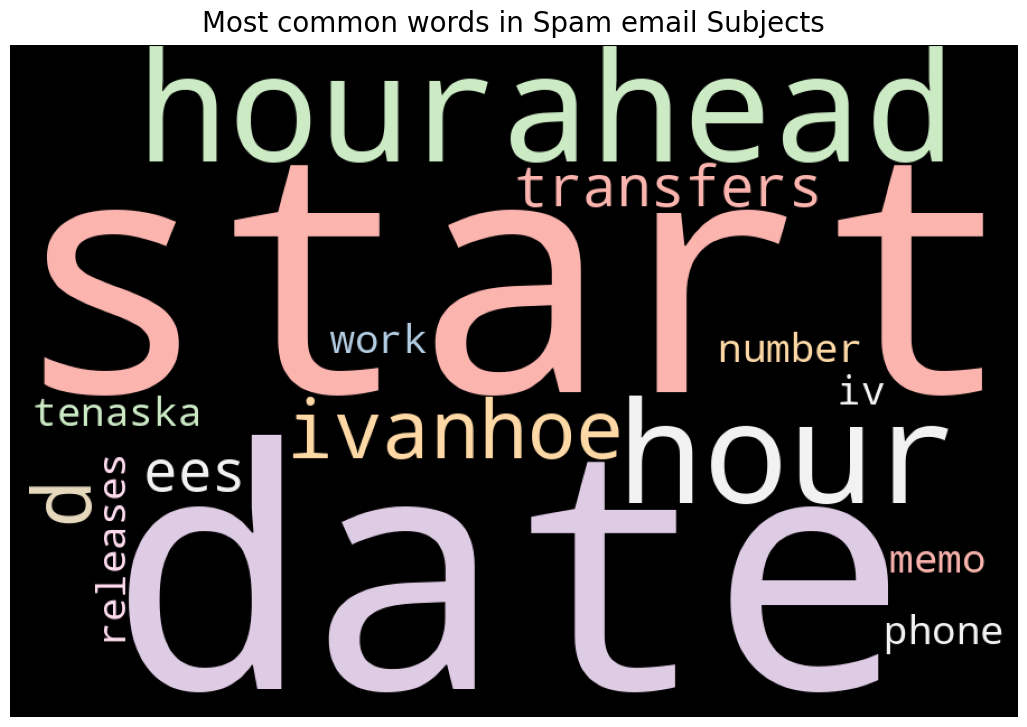

In [ ]:
spam_subject_wordcloud = make_wordcloud (" ".join(spam_subject_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Subjects", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(spam_subject_wordcloud)
plt.axis("off")
plt.show()

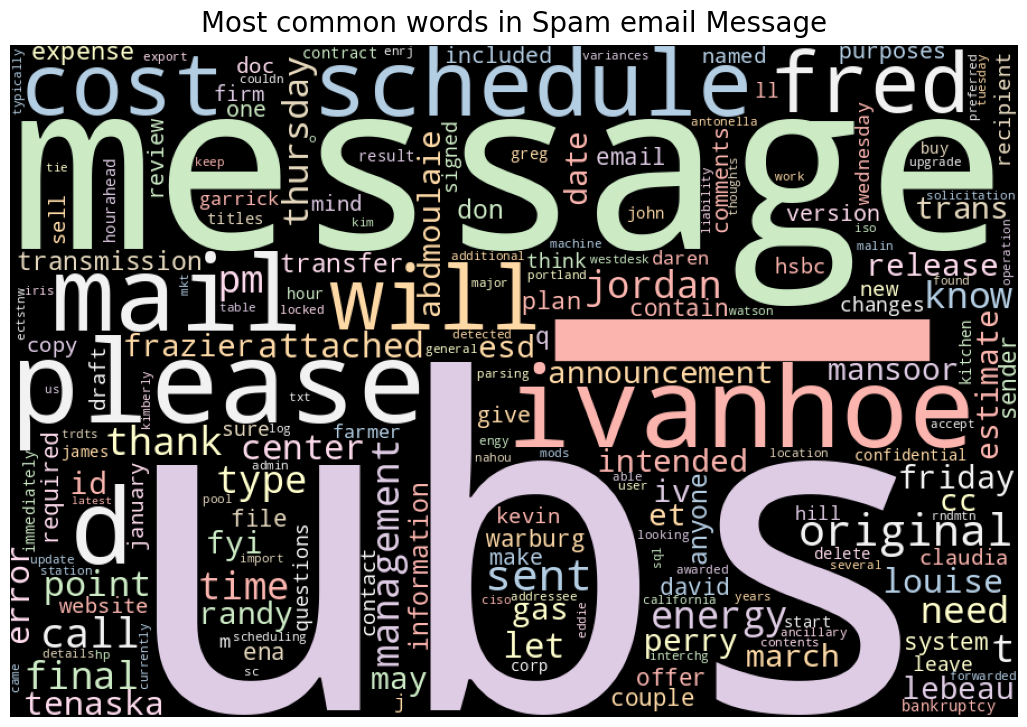

In [ ]:
spam_message_wordcloud = make_wordcloud (" ".join(spam_message_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Message", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(spam_message_wordcloud)
plt.axis("off")
plt.show()

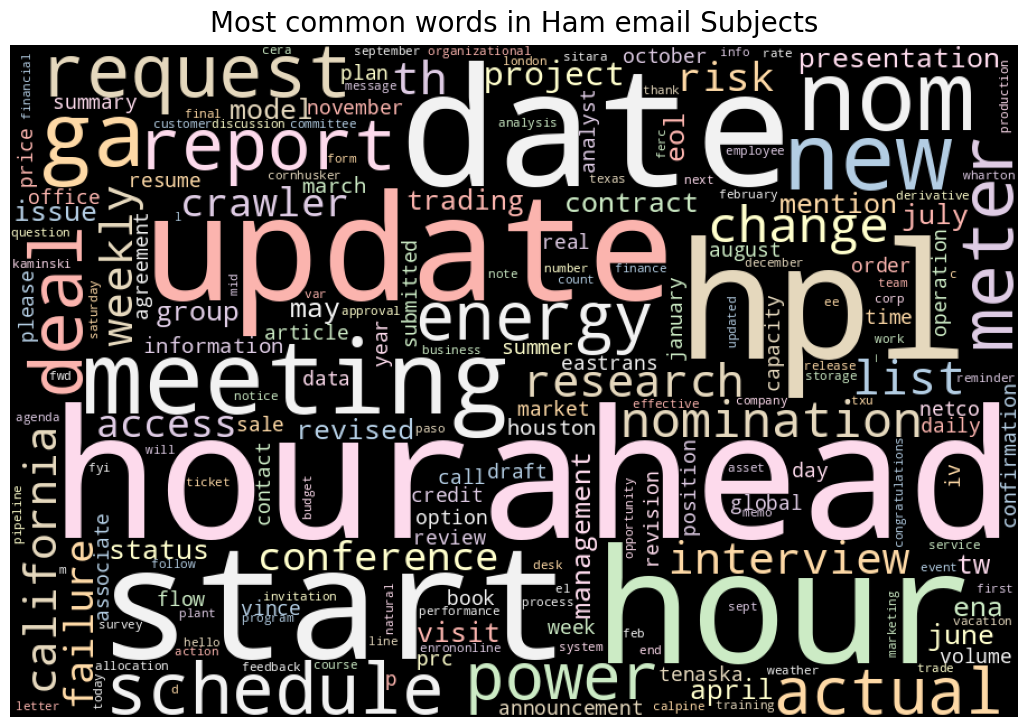

In [ ]:
ham_subject_wordcloud = make_wordcloud (" ".join(ham_subject_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Ham email Subjects", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(ham_subject_wordcloud)
plt.axis("off")
plt.show()

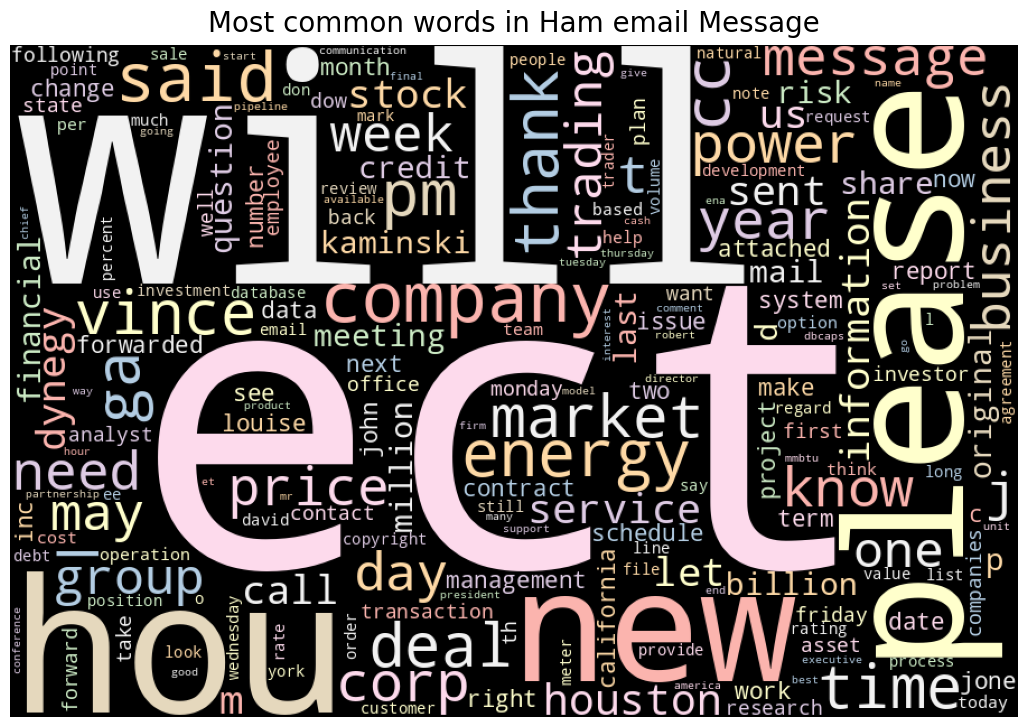

In [ ]:
ham_message_wordcloud = make_wordcloud (" ".join(ham_message_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Ham email Message", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(ham_message_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df.head(5)

,Unnamed: 0,Subject,Message,Spam/Ham,Date,text,tokenized_text,tokenized_subject,tokenized_message
0,0,christmas tree farm pictures,,ham,1999-12-10,christmas tree farm pictures,"[christmas, tree, farm, pictures]","[christmas, tree, farm, pictures]",[]
1,1,vastar resources inc,gary production from the high island larger b...,ham,1999-12-13,vastar resources inc gary production from t...,"[vastar, resources, inc, gary, production, fro...","[vastar, resources, inc]","[gary, production, from, the, high, island, la..."
2,2,calpine daily gas nomination,calpine daily gas nomination 1 doc,ham,1999-12-14,calpine daily gas nomination calpine daily ga...,"[calpine, daily, gas, nomination, calpine, dai...","[calpine, daily, gas, nomination]","[calpine, daily, gas, nomination, 1, doc]"
3,3,re issue,fyi see note below already done \nstella\n ...,ham,1999-12-14,re issue fyi see note below already done \n...,"[re, issue, fyi, see, note, below, already, do...","[re, issue]","[fyi, see, note, below, already, done, stella,..."
4,4,meter 7268 nov allocation,fyi \n forwarded by lauri...,ham,1999-12-14,meter 7268 nov allocation fyi \n ...,"[meter, 7268, nov, allocation, fyi, forwarded,...","[meter, 7268, nov, allocation]","[fyi, forwarded, by, lauri, a, allen, hou, ect..."


In [ ]:
# Create a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=None)

In [ ]:
#Train and Test split
X = df['tokenized_text']
y = df['Spam/Ham']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
print('Encoder classes ', Encoder.classes_)
#Embedding the train and test set
X_train_tfidf = tfidf_vectorizer.fit_transform(" ".join(X_train))
X_test_tfidf = tfidf_vectorizer.transform(" ".join(X_test))

Encoder classes  ['ham' 'spam']


TypeError: ignored

In [ ]:
#Training the classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

In [ ]:
#Make predictions using test data
y_pred = classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Creating and training the SVM classifier

svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

In [ ]:
#making predictions using test data
svm_y_pred = svm_classifier.predict(X_test_tfidf)

In [ ]:
Z

In [ ]:
#evaluating the SVM classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy: ",svm_accuracy,"\n")

print("SVM Classification report: ")
print(classification_report(y_test, svm_y_pred))

In [ ]:
#KNN with k=5 and euclidean distance

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#creating and training the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_classifier.fit(X_train_tfidf, y_train)

In [ ]:
#making predictions using test data
knn_y_pred = knn_classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#performing PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [ ]:
# Train the Naive Bayes classifier on PCA transformed data
pca_classifier = MultinomialNB()
pca_classifier.fit(X_train_pca, y_train)

# Make predictions using test data
pca_y_pred = pca_classifier.predict(X_test_pca)

# Evaluate the PCA classifier
pca_accuracy = accuracy_score(y_test, pca_y_pred)
print("PCA Accuracy:", pca_accuracy)

print("PCA Classification Report:")
print(classification_report(y_test, pca_y_pred))

In [ ]:
# Train the KNN classifier on PCA transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_classifier.fit(X_train_pca, y_train)

#making predictions using test data
knn_y_pred_pca = knn_classifier.predict(X_test_tfidf)

# Evaluate the KNN classifier
knn_accuracy_pca = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy_pca)

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred_pca))